# Spaceship Titanic

In this notebook we are going to analyze which passengers of the spaceship titanic were taken to another dimension by space time anamoly after the collousion so that the scientist could retrive them back in time

we are going to follow the following Framework
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Defination
> Using the data from spaceship damaged computer predict which passengers were transported by anamoly

## 2. Data
> There are two different data sets i.e Training and Test data

check the following link for original data set https://www.kaggle.com/competitions/spaceship-titanic/data


## 3. Evaluation
> we are going to use the classification models with their default evaluation matrices

## 4. Features
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is                   their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
    RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [68]:
# lets import all the tools that we need

# EDA or exploratory data analysis tool
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# lets import the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# lets import evaluation metrices
from sklearn.metrics import classification_report,f1_score,accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


In [3]:
# lets import the data
data = pd.read_csv("train.csv")
data.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data["Transported"].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

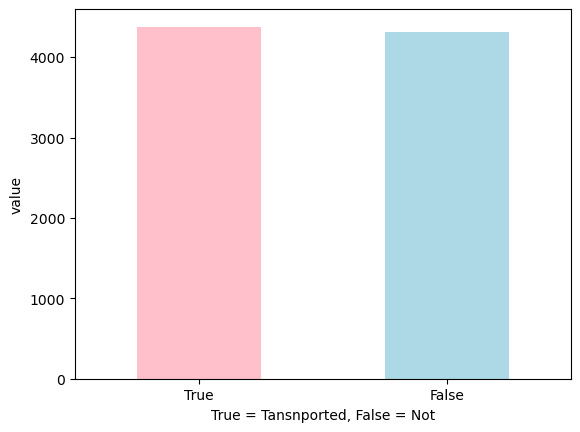

In [5]:
# lets see the target column in bar diagram
data["Transported"].value_counts().plot(kind="bar",color=["pink","lightblue"])
plt.xlabel("True = Tansnported, False = Not")
plt.ylabel("value")
plt.xticks(rotation=0);


In [6]:
data["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Earth'), Text(1, 0, 'Europa'), Text(2, 0, 'Mars')])

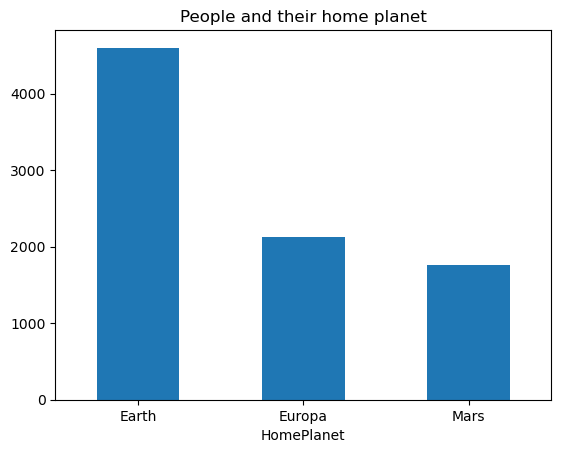

In [7]:
data["HomePlanet"].value_counts().plot(kind="bar")
plt.title("People and their home planet")
plt.xticks(rotation=0)

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
data["Cabin"].value_counts()    

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [11]:
# now lets find the relationship between cabin and transportation
data.groupby("Cabin")["Transported"].mean()

Cabin
A/0/P     0.5
A/0/S     0.0
A/1/S     1.0
A/10/P    0.0
A/10/S    1.0
         ... 
T/0/P     0.0
T/1/P     0.0
T/2/P     0.0
T/2/S     0.0
T/3/P     1.0
Name: Transported, Length: 6560, dtype: float64

In [12]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

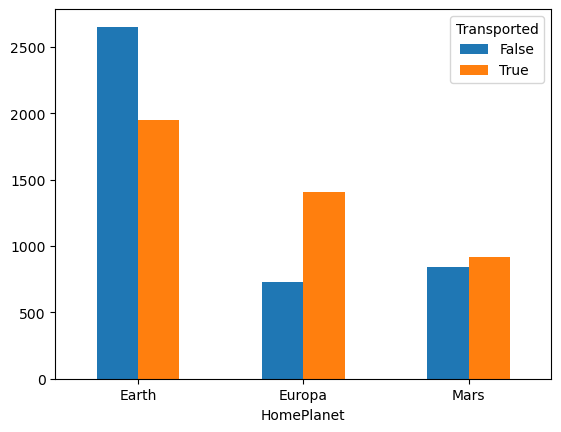

In [13]:
pd.crosstab(data["HomePlanet"],data["Transported"]).plot(kind="bar")
plt.xticks(rotation=0);

(array([ 591.,  649., 2089., 1976., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

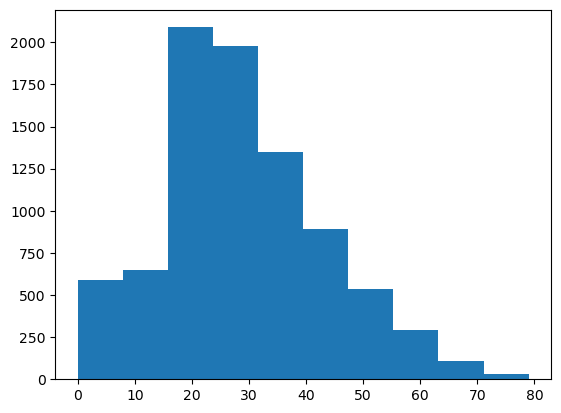

In [14]:
plt.hist(data["Age"])

<Axes: xlabel='VIP'>

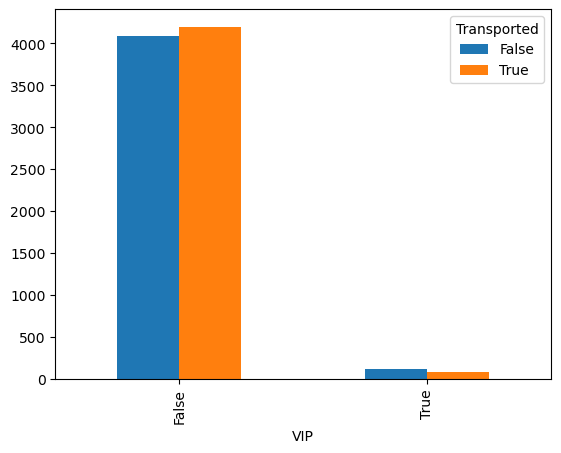

In [15]:
pd.crosstab(data["VIP"],data["Transported"]).plot(kind="bar")

In [16]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [17]:
data["VIP"].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

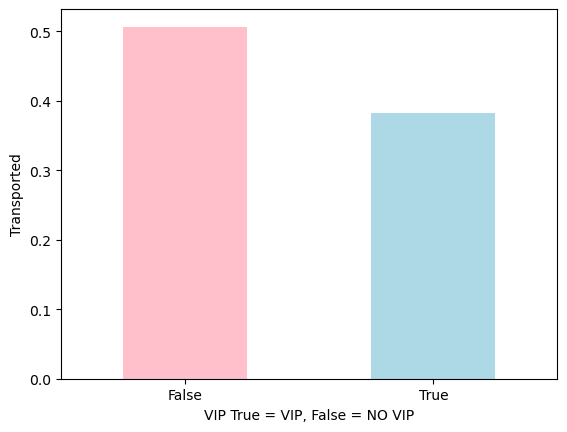

In [21]:
data.groupby("VIP")["Transported"].mean().plot(kind="bar",color=["pink","lightblue"])
plt.xlabel("VIP True = VIP, False = NO VIP")
plt.ylabel("Transported")
plt.xticks(rotation=False);

In [19]:
# data.groupby(["Deck", "CabinNumber", "CabinSide"])["Transported"].value_counts()


In [26]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

(array([0, 1, 2]),
 [Text(0, 0, '55 Cancri e'),
  Text(1, 0, 'PSO J318.5-22'),
  Text(2, 0, 'TRAPPIST-1e')])

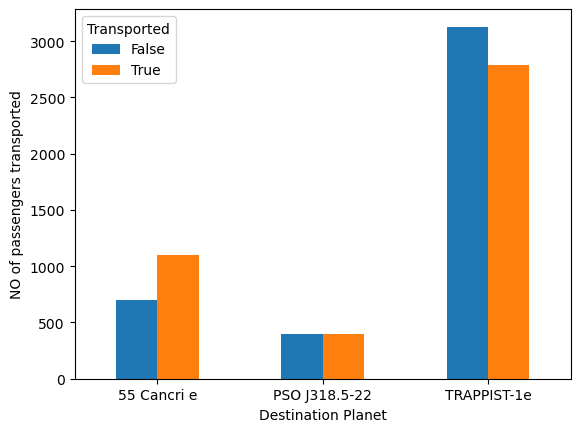

In [31]:
pd.crosstab(data["Destination"],data["Transported"]).plot(kind="bar")
plt.xlabel("Destination Planet")
plt.ylabel("NO of passengers transported")
plt.xticks(rotation=0)

In [34]:
data["Destination"].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

# Now we are going to model the data

In [36]:
# preprocessing function (convert the object into pandas category and fill the mising values)
def preprocessor(data):
    for labels,contents in data.items():
        if pd.api.types.is_numeric_dtype(contents):
            if pd.isnull(contents).sum():
                data[labels+"_Was_Missing"] = pd.isnull(contents)
                data[labels] = contents.fillna(contents.median())
        if not pd.api.types.is_numeric_dtype(contents):
            data[labels+"_Was_Missing"] = pd.isnull(contents)
            data[labels] = pd.Categorical(contents).codes + 1
    return data

In [38]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [40]:
# since we are going to manipulate our data we will br using tmp_data to procees
tmp_data = preprocessor(data)

In [41]:
tmp_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_Was_Missing,Destination_Was_Missing,Age_Was_Missing,VIP_Was_Missing,RoomService_Was_Missing,FoodCourt_Was_Missing,ShoppingMall_Was_Missing,Spa_Was_Missing,VRDeck_Was_Missing,Name_Was_Missing
0,1,2,1,150,3,39.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,2185,3,24.0,1,109.0,9.0,25.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2,1,2,3,58.0,2,43.0,3576.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2,1,2,3,33.0,1,0.0,1283.0,371.0,...,False,False,False,False,False,False,False,False,False,False
4,5,1,1,2187,3,16.0,1,303.0,70.0,151.0,...,False,False,False,False,False,False,False,False,False,False


In [42]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassengerId               8693 non-null   int16  
 1   HomePlanet                8693 non-null   int8   
 2   CryoSleep                 8693 non-null   int8   
 3   Cabin                     8693 non-null   int16  
 4   Destination               8693 non-null   int8   
 5   Age                       8693 non-null   float64
 6   VIP                       8693 non-null   int8   
 7   RoomService               8693 non-null   float64
 8   FoodCourt                 8693 non-null   float64
 9   ShoppingMall              8693 non-null   float64
 10  Spa                       8693 non-null   float64
 11  VRDeck                    8693 non-null   float64
 12  Name                      8693 non-null   int16  
 13  Transported               8693 non-null   bool   
 14  Passenge

In [43]:
tmp_data.isna().sum()

PassengerId                 0
HomePlanet                  0
CryoSleep                   0
Cabin                       0
Destination                 0
Age                         0
VIP                         0
RoomService                 0
FoodCourt                   0
ShoppingMall                0
Spa                         0
VRDeck                      0
Name                        0
Transported                 0
PassengerId_Was_Missing     0
HomePlanet_Was_Missing      0
CryoSleep_Was_Missing       0
Cabin_Was_Missing           0
Destination_Was_Missing     0
Age_Was_Missing             0
VIP_Was_Missing             0
RoomService_Was_Missing     0
FoodCourt_Was_Missing       0
ShoppingMall_Was_Missing    0
Spa_Was_Missing             0
VRDeck_Was_Missing          0
Name_Was_Missing            0
dtype: int64

In [45]:
# lets split the data into x and y (feature and label matrix)
x = tmp_data.drop("Transported",axis=1)
y = tmp_data["Transported"]

# split the data into train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [63]:
# lets import the model and implement it as a function
models = {
    "Random Forest Classifier" : RandomForestClassifier(),
    "Logistic Regressor": LogisticRegression()
}

def fit_n_score(x_train,x_test,y_train,y_test):
    # setup the ramdom seed
    np.random.seed(42)

    # instinciate empty model score dict
    model_scores ={}

    # loop through models
    for name,model in models.items():
        # fit the model
        model.fit(x_train,y_train)

        # score the model
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

scores = fit_n_score(x_train,x_test,y_train,y_test)
scores

C:\Users\Dell\Desktop\ml_ai\Competations\Spaceship\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest Classifier': 0.7883841288096607,
 'Logistic Regressor': 0.7786083956296722}

In [64]:
model_scores = pd.DataFrame(scores,index=["Accuracy"])

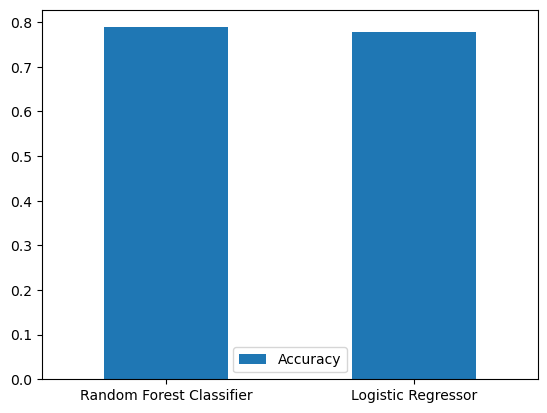

In [65]:
model_scores.T.plot(kind="bar")
plt.xticks(rotation=0);

In [66]:
len(tmp_data)

8693

In [67]:
# lets configure each model and tune them using Random Search cv and grid_search cv
LogisticRegression()
rf_grid = {
    "n_estimators" : np.arange(10,1000,50),
    "max_depth" : [None,3,5,10],
    "min_samples_split" : np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1,20,2)
}

log_reg_grid = {
    "C" : np.logspace(-4,4,20),
    "solver" : ["liblinear","lbfgs"]
}



In [73]:
# lets tune each model using random search cv
# function to tune RandomForestClassifier using Random Search CV
def Random_forest_tune(model,grid,iteration,verbose):
    rs_rf_grid = RandomizedSearchCV(estimator=model,param_distributions=grid,n_iter=iteration,verbose=verbose,n_jobs=-1)
    rs_rf_grid.fit(x_train,y_train)
    return rs_rf_grid.best_params_

Random_forest_best_params = Random_forest_tune(RandomForestClassifier(),rf_grid,20,True)
Random_forest_best_params

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(6),
 'min_samples_leaf': np.int64(5),
 'max_depth': None}

In [79]:
# now we are going to use grid search cv
rf_new_grid_param = {
    "n_estimators" : [200,210,220,250],
    "min_samples_split":[2,4,6,8],
    "min_samples_leaf":[3,5,7,10],
    "max_depth":[None,3]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=rf_new_grid_param,cv=5,n_jobs=-1,verbose=True)
grid_search.fit(x_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 128 candidates, totalling 640 fits


{'max_depth': None,
 'min_samples_leaf': 7,
 'min_samples_split': 8,
 'n_estimators': 200}

In [78]:
# lets tune each model using random search cv
# function to tune LogisticRegressor using Random Search CV
def logistic_model_tune(model,grid,iteration,verbose):
    rs_rf_grid = RandomizedSearchCV(estimator=model,param_distributions=grid,n_iter=iteration,verbose=verbose,n_jobs=-1)
    rs_rf_grid.fit(x_train,y_train)
    return rs_rf_grid.best_params_

Random_forest_best_params = logistic_model_tune(LogisticRegression(),log_reg_grid,20,True)
Random_forest_best_params

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': np.float64(0.004832930238571752)}

In [85]:
logistic_regressor_grid = {
    "C" : [0.004832930238571752],
    "solver" : ["liblinear"]
}


logistic_grid = GridSearchCV(estimator=LogisticRegression(),param_grid=logistic_regressor_grid,verbose=True)
logistic_grid.fit(x_train,y_train)
logistic_grid.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'C': 0.004832930238571752, 'solver': 'liblinear'}

In [81]:
# ideal random forest model
clf = RandomForestClassifier(n_estimators=200,min_samples_split=8,min_samples_leaf=7,max_depth=None)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7998849913743531

In [87]:
# ideal logistic regressor
log_clf = LogisticRegression(C=0.004832930238571752,solver="liblinear")
log_clf.fit(x_train,y_train)
log_clf.score(x_test,y_test)



0.7906843013225991

In [88]:
# since both the model are about 80% i am going to go with Random Forest Classifier

In [89]:
# lets import the test data
test_data = pd.read_csv("test.csv")

In [90]:
# lets preprocess the test data using the 'preprocessor' function
processed_test = preprocessor(test_data)
processed_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_Was_Missing,Destination_Was_Missing,Age_Was_Missing,VIP_Was_Missing,RoomService_Was_Missing,FoodCourt_Was_Missing,ShoppingMall_Was_Missing,Spa_Was_Missing,VRDeck_Was_Missing,Name_Was_Missing
0,1,1,2,2785,3,27.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,1868,3,19.0,1,0.0,9.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2,2,258,1,31.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2,1,260,3,38.0,1,0.0,6652.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,5,1,1,1941,3,20.0,1,10.0,0.0,635.0,...,False,False,False,False,False,False,False,False,False,False


In [91]:
set(x_train.columns) - set(processed_test.columns)

set()

In [92]:
# make prediction on test data
clf = RandomForestClassifier(n_estimators=200,min_samples_split=8,min_samples_leaf=7,max_depth=None)
clf.fit(x_train,y_train)
ideal_preds = clf.predict(processed_test)

In [94]:
ideal_preds

array([ True, False,  True, ...,  True,  True,  True], shape=(4277,))

In [122]:
# doing this so that we can bring actual passenger id that is not preprocessed form test data
original_data = pd.read_csv("test.csv")
original_data["PassengerId"]

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [123]:
# lets format the data
test_results = pd.DataFrame()
test_results["PassengerId"] = original_data["PassengerId"]
test_results["Transported"] = ideal_preds

test_results

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [124]:
test_results.to_csv("Spaceship-titanic-predictions.csv",index=False)

In [125]:
test_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB
